# Exploring OpenOx

<div class="alert alert-block alert-warning">
<p><b>Note:</b> This tutorial is of limited use, as it requires files to be downloaded manually, and then run locally. The OpenOximetry Repository isn't used further in this book.</p>
</div>

This is an initial introduction to reading PPG files in the OpenOximetry Repository.

<div class="alert alert-block alert-warning">
<p><b>Resource:</b> You can find out more about the OpenOximetry Repository <a href="https://physionet.org/content/openox-repo/1.0.0/">here</a>.</p>
</div>

---
## Setup

### Specify the required Python packages
We'll import the following:
- _os_
- _numpy_
- _matplotlib_: for plotting

In [86]:
import os
import matplotlib.pyplot as plt
import numpy as np

### Specify a particular version of the WFDB Toolbox

- _wfdb_: For this workshop we will be using version 4 of the WaveForm DataBase (WFDB) Toolbox package. The package contains tools for processing waveform data such as the PPG signals found in the OpenOximetry repository:

In [ ]:
!pip install wfdb==4.1.0
import wfdb

<div class="alert alert-block alert-warning">
<p><b>Resource:</b> You can find out more about the WFDB package <a href="https://physionet.org/content/wfdb-python/3.4.1/">here</a>.</p>
</div>

Now that we have imported these packages (_i.e._ toolboxes) we have a set of tools (functions) ready to use.

### Download a WFDB file containing a PPG signal

In preparation for this, I have downloaded the following two files:
- [0274ff212eab782d3a29b533b78a051984a04469844659e3cab48bab230e2e1d_ppg.dat](https://physionet.org/files/openox-repo/1.0.0/waveforms/0/0274ff212eab782d3a29b533b78a051984a04469844659e3cab48bab230e2e1d_ppg.dat?download)
- [0274ff212eab782d3a29b533b78a051984a04469844659e3cab48bab230e2e1d_ppg.hea](https://physionet.org/files/openox-repo/1.0.0/waveforms/0/0274ff212eab782d3a29b533b78a051984a04469844659e3cab48bab230e2e1d_ppg.hea?download)

I then moved them to a new folder at the following path (if you are repeating this you will need to update this with the path to your own folder):

In [89]:
local_record_dir = '/Users/petercharlton/Downloads/downloaded2/curr_files/'

Local WFDB record names: ['0274ff212eab782d3a29b533b78a051984a04469844659e3cab48bab230e2e1d_ppg']


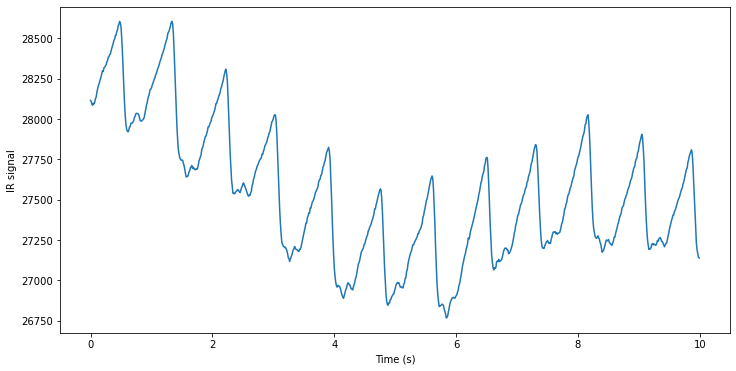

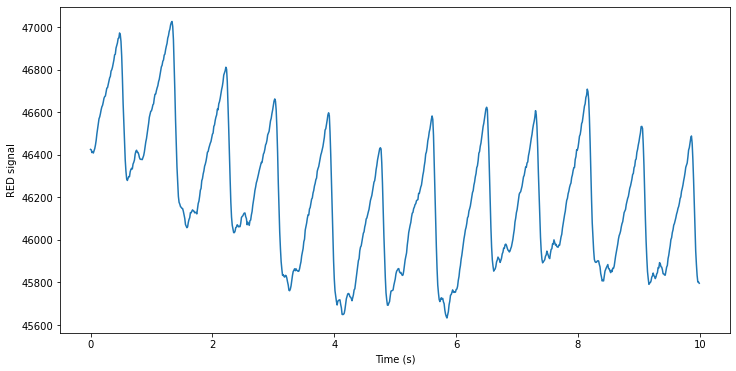

In [90]:
# Identify all files in the directory
all_files = os.listdir(local_record_dir)

# Filter to get only record files (assuming .dat and .hea files are used for records)
record_files = [f for f in all_files if f.endswith('.dat')]

# Remove the file extension to get the record names
record_names = [os.path.splitext(f)[0] for f in record_files]

print("Local WFDB record names:", record_names)

# Load and process each record
start_sample = 50000  # Replace with your desired start sample index
end_sample = start_sample+10*record.fs    # Replace with your desired end sample index
for record_name in record_names:
    record_path = os.path.join(local_record_dir, record_name)
    record = wfdb.rdrecord(record_path, sampfrom = start_sample, sampto = end_sample)
    num_samples = len(record.p_signal)
    time_vector = np.arange(num_samples) / record.fs
    # Plot the signals
    for i in range(record.n_sig):
        plt.figure(figsize=(12, 6))
        plt.plot(time_vector,record.p_signal[:, i], label=f'Signal {i+1}')
        plt.xlabel('Time (s)')
        plt.ylabel(record.sig_name[i] + ' signal')